In [2]:
from src.proby.lib_dp import create_dg, Probe, get_polynomial, GameEnd
from typing import NamedTuple
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class GameScore(NamedTuple):
    p1: int
    p2: int
    p1_serving: bool

init_game = GameScore(p1=0, p2=0, p1_serving=True)
def play_game(score: GameScore, p: Probe, q: Probe) -> GameScore | GameEnd:
    sp = p if score.p1_serving else q
    if sp.run():
        score = GameScore(p1=score.p1 + 1, p2=score.p2, p1_serving=score.p1_serving)
    else:
        score = GameScore(p1=score.p1, p2=score.p2 + 1, p1_serving=score.p1_serving)
    if max(score.p1, score.p2) == 4:
        return GameEnd.WIN if score.p1 > score.p2 else GameEnd.LOSE
    return score

class TieBreakScore(NamedTuple):
    p1: int
    p2: int
    p1_serving: bool
def play_tie_break(score: TieBreakScore, p: Probe, q: Probe) -> TieBreakScore | GameEnd:
    sp = p if score.p1_serving else q
    if sp.run():
        score = TieBreakScore(p1=score.p1 + 1, p2=score.p2, p1_serving=score.p1_serving)
    else:
        score = TieBreakScore(p1=score.p1, p2=score.p2 + 1, p1_serving=score.p1_serving)
    if score.p1 + score.p2 % 2 == 0:
        score = TieBreakScore(p1=score.p1, p2=score.p2, p1_serving=not score.p1_serving)
    if max(score.p1, score.p2) == 7:
        return GameEnd.WIN if score.p1 > score.p2 else GameEnd.LOSE
    return score

def play_game(score: GameScore, p: Probe, q: Probe) -> GameScore | GameEnd:
    sp = p if score.p1_serving else q
    if sp.run():
        score = GameScore(p1=score.p1 + 1, p2=score.p2, p1_serving=score.p1_serving)
    else:
        score = GameScore(p1=score.p1, p2=score.p2 + 1, p1_serving=score.p1_serving)
    if max(score.p1, score.p2) == 4:
        return GameEnd.WIN if score.p1 > score.p2 else GameEnd.LOSE
    return score


class SetScore(NamedTuple):
    p1: int
    p2: int
    current_game: GameScore
    tie_break: TieBreakScore
def play_set(score: SetScore, p: Probe, q: Probe) -> GameScore | GameEnd:
    if score.p1 == score.p2 == 6:
        new_set_score = play_tie_break(score=score.tie_break, p=p, q=q)
        if new_set_score in [GameEnd.WIN, GameEnd.LOSE]:
            return new_set_score
        else:
            return SetScore(p1=score.p1, p2=score.p2, current_game=score.current_game, tie_break=new_set_score)
    else:
        current_game = play_game(score=score.current_game, p=p, q=q)
        if current_game == GameEnd.WIN:
            score = SetScore(p1=score.p1 + 1, p2=score.p2, current_game=GameScore(p1=0, p2=0, p1_serving=not score.current_game.p1_serving), tie_break=score.tie_break)
        elif current_game == GameEnd.LOSE:
            score = SetScore(p1=score.p1, p2=score.p2 + 1, current_game=GameScore(p1=0, p2=0, p1_serving=not score.current_game.p1_serving), tie_break=score.tie_break)
        else:
            score = SetScore(p1=score.p1, p2=score.p2, current_game=current_game, tie_break=score.tie_break)
        if max(score.p1, score.p2) >= 6 and  abs(score.p1 - score.p2) > 1:
            return GameEnd.WIN if score.p1 > score.p2 else GameEnd.LOSE
        return score

init_set = SetScore(p1=0, p2=0, current_game=GameScore(p1=0, p2=0, p1_serving=True), tie_break=TieBreakScore(p1=0, p2=0, p1_serving=True))
dg = create_dg(init_set, play_fn=play_set)
poly = get_polynomial(dg, init_set)
print(poly)

+183826562500p^12q^12 -987411250000p^16q^11 +361381620801600p^15q^15 +46821859015085000p^19q^14 -2427115227824962500p^18q^18 +17338227701801925842000p^22q^21 -1197500318536659135740000p^29q^20 +46280173051944371155152040p^30q^20 -208467612238674985777759500p^31q^20 +596311752981867818366359840p^32q^20 -1162348192126142436119821200p^33q^20 +1093399542821803033972271760p^34q^20 +2433701422323349005854147800p^35q^20 -15999169952944572456151600p^22q^27 +46777016228732747348692400p^22q^28 -86615054115165411691709400p^22q^29 +79079956394948687391711180p^22q^30 +99912657737745254524943800p^22q^31 +53958642302723599067457040p^23q^27 -105766097215096192047254760p^24q^27 +14062149345601380182398000p^29q^21 +6493102769443228075928040p^30q^21 -112932977254720309491067880p^31q^21 -135061736849587961734321600p^23q^28 +196097119633232223691635400p^24q^28 -66007699734250201728116840p^29q^22 -392576068234760473422268300p^30q^22 +2208141370997189520435763460p^31q^22 +183355998533984715360109600p^23q^29 

In [1]:
ps=np.arange(0,0.5,0.01)
vs = poly.call(p=ps, q=ps)
plt.plot(vs)

NameError: name 'np' is not defined

In [ ]:


# Define the score structure for match, set, and game
Score = namedtuple('Score', ['sets', 'games_p1', 'games_p2', 'points_p1', 'points_p2'])

# Represents the state of a match
def play_match(score: Score, p: Probe, q: Probe) -> tuple | GameEnd:
    def play_game(player_p, player_q, score):
        # Play a game between two players (p1 and p2), with their probes passed
        while True:
            # Determine which player is active
            sp = player_p if ((score.points_p1 + score.points_p2) % 2 == 0) else player_q
            
            # Run the active player's probe to decide if they win the point
            if sp.run():
                score = Score(score.sets, score.games_p1 + 1, score.games_p2, score.points_p1 + 1, score.points_p2)
            else:
                score = Score(score.sets, score.games_p1, score.games_p2 + 1, score.points_p1, score.points_p2 + 1)
            
            # Check if a player has won the game (winning player needs 4 points and at least 2 more than opponent)
            if score.points_p1 >= 4 and score.points_p1 - score.points_p2 >= 2:
                return Score(score.sets, score.games_p1 + 1, score.games_p2, 0, 0)
            elif score.points_p2 >= 4 and score.points_p2 - score.points_p1 >= 2:
                return Score(score.sets, score.games_p1, score.games_p2 + 1, 0, 0)
    
    def play_set(player_p, player_q, score):
        # Play a set between two players, passing their probes
        while True:
            # If score reaches 6-6, we play a tiebreak
            if score.games_p1 == 6 and score.games_p2 == 6:
                score = play_tiebreak(player_p, player_q, score)
                return score
            # Normal game play
            score = play_game(player_p, player_q, score)
            
            # Check if someone won the set
            if score.games_p1 == 6:
                return Score(score.sets, 0, 0, score.points_p1, score.points_p2)
            elif score.games_p2 == 6:
                return Score(score.sets, 0, 0, score.points_p1, score.points_p2)
    
    def play_tiebreak(player_p, player_q, score):
        # Play a tiebreaker game (first to 7 points, with 2-point lead), passing their probes
        score = Score(score.sets, score.games_p1, score.games_p2, 0, 0)
        while True:
            # Determine which player is active in the tiebreak
            sp = player_p if ((score.points_p1 + score.points_p2) % 2 == 0) else player_q
            
            # Run the active player's probe to decide if they win the point
            if sp.run():
                score = Score(score.sets, score.games_p1, score.games_p2, score.points_p1 + 1, score.points_p2)
            else:
                score = Score(score.sets, score.games_p1, score.games_p2, score.points_p1, score.points_p2 + 1)

            # Check if tiebreaker has a winner (7 points, 2-point margin)
            if score.points_p1 >= 7 and score.points_p1 - score.points_p2 >= 2:
                return Score(score.sets + 1, score.games_p1 + 1, score.games_p2, 0, 0)
            elif score.points_p2 >= 7 and score.points_p2 - score.points_p1 >= 2:
                return Score(score.sets + 1, score.games_p1, score.games_p2 + 1, 0, 0)
    
    # Main loop for playing the match (best of 2 sets)
    while True:
        # Play a set, passing the probes for each player
        score = play_set(p, q, score)

        # Check if match has a winner (first player to win 2 sets wins)
        if score.sets == 2:
            if score.games_p1 > score.games_p2:
                return GameEnd.WIN
            else:
                return GameEnd.LOSE
        # If not, proceed to next set (reset game scores for next set)
        score = Score(score.sets + 1, 0, 0, 0, 0)


initial_score = Score(sets=0, games_p1=0, games_p2=0, points_p1=0, points_p2=0)

In [5]:
dg = create_dg(initial_score, play_match)


KeyboardInterrupt



In [37]:
@point
def tp1(x):
    return True

@point
def tp2(x):
    return False


@point
def tie_break(x):
    pp = [0, 0]
    i = 0
    while max(pp) < 11:
        i += 1
        if (i//2) % 2:
            pp[tp2(x)] += 1
        else:
            pp[tp1(x)] += 1
    return pp[1] > pp[0]

@point
def tie_break_advantages(x):
    pp = [0, 0]
    i = 0
    while max(pp) < 7 or abs(pp[0] - pp[1]) < 2:
        i += 1
        if (i//2) % 2:
            pp[tp2(x)] += 1
        else:
            pp[tp1(x)] += 1

        if max(pp) > 12:
            break
    return pp[1] > pp[0]
tie_break.compute_tree()

In [38]:
tp2.probability(base_point={})

0.0

In [41]:
1==1==1

True

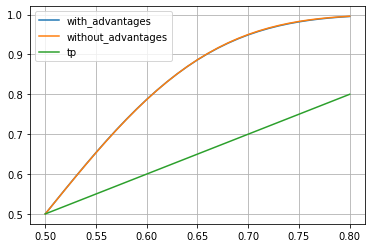

In [45]:
ps = np.arange(0.5, 0.8, 0.01)
def logit(x):
    return np.log(np.abs(x/(1-x)))
for P in [with_advantages, without_advantages, tp]:
    plt.plot(ps, abs(np.array([P.probability(base_point={tp: p}) for p in ps])), label=P)
plt.legend()
plt.grid()

In [14]:
i = 0
while i<10:
    i += 1
    print((i//2) % 2)

0
1
1
0
0
1
1
0
0
1
